# Taylorの定理

黒木玄

2018-04-20

* Copyright 2018 Gen Kuroki
* License: MIT https://opensource.org/licenses/MIT

このファイルは次の場所できれいに閲覧できる:

* http://nbviewer.jupyter.org/github/genkuroki/Calculus/blob/master/06%20Taylor%27s%20theorems.ipynb

このファイルは <a href="https://juliabox.com">Julia Box</a> で利用できる.

自分のパソコンに<a href="https://julialang.org/">Julia言語</a>をインストールしたい場合には

* <a href="http://nbviewer.jupyter.org/gist/genkuroki/81de23edcae631a995e19a2ecf946a4f">WindowsへのJulia言語のインストール</a>

を参照せよ.

論理的に完璧な説明をするつもりはない. 細部のいい加減な部分は自分で訂正・修正せよ.

$
\newcommand\eps{\varepsilon}
\newcommand\ds{\displaystyle}
\newcommand\Z{{\mathbb Z}}
\newcommand\R{{\mathbb R}}
\newcommand\C{{\mathbb C}}
\newcommand\QED{\text{□}}
\newcommand\root{\sqrt}
$

<h1>目次<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Taylorの定理" data-toc-modified-id="Taylorの定理-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Taylorの定理</a></span><ul class="toc-item"><li><span><a href="#積分型剰余項型Taylorの定理" data-toc-modified-id="積分型剰余項型Taylorの定理-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>積分型剰余項型Taylorの定理</a></span><ul class="toc-item"><li><span><a href="#積分型剰余項の絶対値の上からの評価" data-toc-modified-id="積分型剰余項の絶対値の上からの評価-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>積分型剰余項の絶対値の上からの評価</a></span></li><li><span><a href="#積分型剰余項の書き直し:-1重積分の形" data-toc-modified-id="積分型剰余項の書き直し:-1重積分の形-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>積分型剰余項の書き直し: 1重積分の形</a></span></li><li><span><a href="#積分型剰余項の書き直し:-積分を使わない形" data-toc-modified-id="積分型剰余項の書き直し:-積分を使わない形-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>積分型剰余項の書き直し: 積分を使わない形</a></span></li><li><span><a href="#Landau記号を用いたTaylorの定理" data-toc-modified-id="Landau記号を用いたTaylorの定理-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>Landau記号を用いたTaylorの定理</a></span></li></ul></li><li><span><a href="#$n$-回の微分可能性だけを仮定したTaylorの定理について" data-toc-modified-id="$n$-回の微分可能性だけを仮定したTaylorの定理について-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>$n$ 回の微分可能性だけを仮定したTaylorの定理について</a></span></li></ul></li><li><span><a href="#Taylor展開" data-toc-modified-id="Taylor展開-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Taylor展開</a></span><ul class="toc-item"><li><span><a href="#基本的なTaylor展開の例" data-toc-modified-id="基本的なTaylor展開の例-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>基本的なTaylor展開の例</a></span></li><li><span><a href="#コンピューターを用いた計算例" data-toc-modified-id="コンピューターを用いた計算例-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>コンピューターを用いた計算例</a></span></li></ul></li><li><span><a href="#べき級数の収束" data-toc-modified-id="べき級数の収束-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>べき級数の収束</a></span><ul class="toc-item"><li><span><a href="#べき級数の定義" data-toc-modified-id="べき級数の定義-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>べき級数の定義</a></span></li><li><span><a href="#べき級数の収束" data-toc-modified-id="べき級数の収束-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>べき級数の収束</a></span></li></ul></li><li><span><a href="#超幾何級数" data-toc-modified-id="超幾何級数-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>超幾何級数</a></span></li></ul></div>

In [1]:
using Plots
gr(); ENV["PLOTS_TEST"] = "true"
#clibrary(:colorcet)
clibrary(:misc)

function pngplot(P...; kwargs...)
    sleep(0.1)
    pngfile = tempname() * ".png"
    savefig(plot(P...; kwargs...), pngfile)
    showimg("image/png", pngfile)
end
pngplot(; kwargs...) = pngplot(plot!(; kwargs...))

showimg(mime, fn) = open(fn) do f
    base64 = base64encode(f)
    display("text/html", """<img src="data:$mime;base64,$base64">""")
end

using SymPy
#sympy[:init_printing](order="lex") # default
#sympy[:init_printing](order="rev-lex")

using SpecialFunctions
using QuadGK

## Taylorの定理

$$
f(x) = f(a) + f'(a)(x-a) + \frac{1}{2}f''(a)(x-a)^2 + \cdots + \frac{1}{k!}f^{(k)}(a)(x-a)^k + \cdots
$$

の最後の $+\cdots$ の部分を $f$ の $k+1$ 階の導函数の式で書いた結果を**Taylorの定理**と呼ぶことにする.  その表示の仕方には様々な形がある.

### 積分型剰余項型Taylorの定理

$f$ は $C^n$ 級函数であると仮定する.  

まず, $n=4$ の場合を例として扱う. そのとき

$$
f'''(x) = f'''(a) + \int_a^x f^{(4)}(x_4)\,dx_4.
$$

ゆえに

$$
\begin{aligned}
f''(x) &= 
f''(a) + \int_0^x f'''(x_3)\,dx_3
\\ & =
f''(a) + f'''(a)(x-a) + \int_a^x\left[\int_a^{x_3} f^{(4)}(x_4)\,dx_4\right]\,dx_3.
\end{aligned}
$$

括弧が増えると書くのが面倒になるので

$$
\int_a^x dx_3\int_a^{x_3} dx_4\; f^{(4)}(x_4) :=
\int_a^x\left[\int_a^{x_3} f^{(4)}(x_4)\,dx_4\right]\,dx_3
$$

と書くことにする. 積分が3重以上でも同様に書くことにする.  そのように書くと, 

$$
f''(x) = 
f''(a) + f'''(a)(x-a) + \int_a^x dx_3\int_a^{x_3} dx_4\; f^{(4)}(x_4).
$$

ゆえに

$$
\begin{aligned}
f'(x) &= f'(a) + \int_a^x dx_2\,f''(x_2)
\\ & =
f'(a) + f''(a)(x-a) + \frac{1}{2}f'''(a)(x-a)^2 + 
\int_a^x dx_2\int_a^{x_2}dx_3\int_a^{x_3} dx_4\; f^{(4)}(x_4).
\end{aligned}
$$

さらに, 

$$
\begin{aligned}
f(x) &= f(a) + \int_a^x dx_1\,f'(x_1)
\\ & =
f(a) + f'(a)(x-a) + \frac{1}{2}f''(a)(x-a)^2 + \frac{1}{3!}f'''(a)(x-a)^3 +
\int_a^x dx_1 \int_a^{x_1} dx_2\int_a^{x_2}dx_3\int_a^{x_3} dx_4\; f^{(4)}(x_4).
\end{aligned}
$$

以上をまとめると, 

$$
\begin{aligned}
&
f(x) = f(a) + f'(a)(x-a) + \frac{1}{2}f''(a)(x-a)^2 + \frac{1}{3!}f'''(a)(x-a)^3 + R_4,
\\ &
R_4 = \int_a^x dx_1 \int_a^{x_1} dx_2\int_a^{x_2}dx_3\int_a^{x_3} dx_4\; f^{(4)}(x_4).
\end{aligned}
$$

上と同様にして次が成立することを示せる.

**Taylorの定理:** $f$ は $C^n$ 級函数であると仮定する. そのとき, 
$$
\begin{aligned}
&
f(x) = f(a) + f'(a)(x-a) + \frac{1}{2}f''(a)(x-a)^2 + \cdots + 
\frac{1}{(n-1)!}f^{(n-1)}(a)(x-a)^{n-1} + R_n,
\\ &
R_n = \int_a^x dx_1 \int_a^{x_1} dx_2\cdots\int_a^{x_{n-1}} dx_n\; f^{(n)}(x_n).
\qquad 
\end{aligned}
$$

$R_n$ を**剰余項**と呼ぶ. $\QED$

この形のTaylorの定理は $f^{(n)}(x)$ を何度も積分するだけで得られ, 技巧的な証明の工夫をする必要が一切ない.

**問題:** 上の形のTaylorの定理の証明を完成せよ. $\QED$

#### 積分型剰余項の絶対値の上からの評価

以下, $a$ と $x$ のあいだの $t$ について $|f^{(n)}(t)|\leqq M$ が成立しているとき, 

$$
|R_n| \leqq \left|\int_a^x dx_1 \int_a^{x_1} dx_2\cdots\int_a^{x_{n-1}} dx_n\; M \right| = 
\frac{1}{n!}M |x-a|^n.
$$

ここで, 

$$
\int_a^x dx_1 \int_a^{x_1} dx_2\cdots\int_a^{x_{n-1}} dx_n\;1 = \frac{1}{n!}(x-a)^n
$$

となることを使った. $1$ を $a$ から $x$ まで積分する操作を $n$ 回繰り返すとそうなることは容易に確かめられる.

$$
|R_n| \leqq \frac{M |x-a|^n}{n!}
$$

の形の不等式はよく使われる.

#### 積分型剰余項の書き直し: 1重積分の形

**定理:**
$$
R_n = \int_a^x f^{(n)}(x_n) \frac{(x-x_n)^{n-1}}{(n-1)!}\,dx_n.
$$

**証明:** 簡単のため $a<x$ と仮定する($a>x$ の場合も同様である).  そのとき, 積分

$$
R_n = \int_a^x dx_1 \int_a^{x_1} dx_2\cdots\int_a^{x_{n-1}} dx_n\; f^{(n)}(x_n)
$$

の中の $x_i$ たちは $a\leqq x_n \leqq x_{n-1}\leqq\cdots x_2 \leqq x_1 \leqq x$ を動く. ゆえに, この積分は

$$
R_n = \int_a^x\left[\,
f^{(n)}(x_n)
\int_{x_n}^x dx_1\int_{x_n}^{x_1}dx_2\cdots\int_{x_n}^{x_{n-2}}dx_{n-1}\; 1
\right]\,dx_n
$$


と書き直される. そして, 

$$
\int_{x_n}^x dx_1\int_{x_n}^{x_1}dx_2\cdots\int_{x_n}^{x_{n-2}}dx_{n-1}\; 1 = 
\frac{(x-x_n)^{n-1}}{(n-1)!}
$$

なので上の定理が得られる. $\QED$

**注意:** $f$ が $C^{n+1}$ 級函数ならば, 上の定理の $n$ の場合の結果から, 部分積分によって

$$
R_n = f^{(n)}(a)\frac{(x-a)^n}{n!} + R_{n+1}
$$

が得られる(問題: 示してみよ). ゆえに, 部分積分を用いた $n$ に関する帰納法によっても上の定理を示せる. 部分積分を用いる計算法はよく使われる. $\QED$

#### 積分型剰余項の書き直し: 積分を使わない形

簡単のため $a<x$ であると仮定する.

$f$ は $C^n$ 級函数であるとする. そのとき $f^{(n)}$ は連続函数になる. $f^{(n)}(t)$ の $a\leqq t\leqq x$ における最小値と最大値はそれぞれ $f^{(n)}(\alpha)$, $f^{(n)}(\beta)$ であるとする. そのとき,

$$
f^{(n)}(\alpha) \frac{(x-a)^n}{n!}\leqq  R_n \leqq f^{(n)}(\beta) \frac{(x-a)^n}{n!}
$$

が成立する. なぜならば $R_n$ の中の $f^{(n)}(x_n)$ を定数 $C$ で置き換えると $R_n$ の値は $C(x-a)^n/n!$ に変わるからである. 中間値の定理より, ある実数 $\xi$ で

$$
R_n = f^{(n)}(\xi)\frac{(x-a)^n}{n!}, \quad a<\xi<x 
$$

を満たすものが存在する.  $a<x$ の仮定を $a>x$ で置き換えると, $a<\xi<x$ は $a>\xi>x$ に変わる.

剰余項の

$$
R_n = f^{(n)}(\xi)\frac{(x-a)^n}{n!}, \quad a{< \atop >}\xi{<\atop >}x 
$$

の形もよく使われる.

#### Landau記号を用いたTaylorの定理

$C^n$ 級函数 $f$ について $a$ と $x$ のあいだのある実数 $\xi$ で

$$
R_n = f^{(n)}(\xi)\frac{(x-a)^n}{n!}
$$

を満たすものが存在することを上で示した. $f^{(n)}$ は連続なので $x\to a$ のとき $f^{(n)}(\xi)\to f^{(n)}(a)$ となる. ゆえに

$$
R_n - f^{(n)}(a)\frac{(x-a)^n}{n!} = (f^{(n)}(\xi) - f^{(n)}(a))\frac{(x-a)^n}{n!} = o((x-a)^n)
\quad (x\to a).
$$

これで次が成立することがわかった:

$$
f(x) = f(a) + f'(a)(x-a) + \frac{1}{2}f''(a)(x-a)^2 + \cdots + 
\frac{1}{n!}f^{(n)}(a)(x-a)^n + o((x-a)^n)
\quad (x\to a).
$$

Taylorの定理はこの形でもよく使われる.

さらに $f$ が $C^{n+1}$ 級ならば, $n+1$ 次の剰余項は

$$
R_{n+1} = \frac{1}{(n+1)!}f^{(n+1)}(\xi)(x-a)^{n+1} = O((x-a)^{n+1}), \quad
\text{($\xi$ は $a$ と $x$ のあいだにある)}
$$

の形をしているので, 

$$
f(x) = f(a) + f'(a)(x-a) + \frac{1}{2}f''(a)(x-a)^2 + \cdots + 
\frac{1}{n!}f^{(n)}(a)(x-a)^n + O((x-a)^{n+1})
\quad (x\to a).
$$

も成立していることがわかる.

### $n$ 回の微分可能性だけを仮定したTaylorの定理について

以上では $C^n$ 級の仮定のもとでTaylorの定理を証明したが, $n$ 回微分可能の仮定のもとでもTaylorの定理を導くことができる. 例えば, 

* 高木貞治『解析概論』改定第三版

の第25節のpp.61-63に詳しい説明がある. このノートでは技巧的になり過ぎるので扱わないことにする.

## Taylor展開

$C^\infty$ 函数 $f$ について, ある $r>0$ が存在して, 

$$
f(x) = \sum_{k=0}^\infty \frac{1}{k!}f^{(k)}(a)(x-a)^k
$$

が $|x-a|<r$ で収束するとき $f$ は $x=a$ で**Taylor展開**可能であるという. そのような $r$ の最大値をTaylor展開の**収束半径**と呼ぶ. Taylor展開は**べき級数展開**と呼ばれることも多い.

$x=0$ におけるTaylor展開は**Maclaurin展開**と呼ばれることがある.

### 基本的なTaylor展開の例

以下のTaylor展開はよく使われる.

$$
\begin{aligned}
&
(1+x)^a = \sum_{k=0}^\infty\binom{a}{k}x^k \qquad(|x|<1), 
\qquad \binom{a}{k} = \frac{a(a-1)\cdots(a-k+1)}{k!}.
\\ &
(1-x)^{-a} = \sum_{k=0}^\infty\frac{(a)_k}{k!} x^k \qquad(|x|<1), 
\qquad (a)_k = a(a+1)\cdots(a+k-1).
\\ &
e^x = \sum_{k=0}^\infty \frac{x^k}{k!} \qquad(|x|<\infty).
\\ &
\cos x = \sum_{k=0}^\infty \frac{(-1)^k x^{2k}}{(2k)!} \qquad(|x|<\infty).
\\ &
\sin x = \sum_{k=0}^\infty \frac{(-1)^k x^{2k+1}}{(2k+1)!} \qquad(|x|<\infty).
\\ &
\log(1+x) = \sum_{k=1}^\infty \frac{(-1)^{k-1}x^k}{k}, \qquad (|x|<1).
\\ &
-\log(1-x) = \sum_{k=1}^\infty \frac{x^k}{k} \qquad (|x|<1).
\\ &
\arcsin x = \sum_{k=0}^\infty (-1)^k\binom{-1/2}{k}\frac{x^{2k+1}}{2k+1} =
\sum_{k=0}^\infty \frac{1}{2^{2k}}\frac{(2k)!}{(k!)^2}\frac{x^{2k+1}}{2k+1}
\qquad (|x|<1).
\\ &
\arctan x = \sum_{k=0}^\infty (-1)^k\frac{x^{2k+1}}{2k+1} 
\qquad (|x|<1).
\end{aligned}
$$

**問題:** 以上の公式をすべて示せ. $\QED$

解答は略す. まずは自分で $f(0)$, $f'(0)$, $f''(0)$, $f'''(0)$ を計算してみよう. そして, 個人的には最初の段階ではTaylor展開が収束するか否かにはあまり神経を使わなくてもよいと思う. 

他人が書いた解説に単に従うだけだと数学は決して理解できない. 自分で何を計算するべきであるかを考え, 自分が持っている力でその計算を実行してみて, その計算結果を見て次に何を計算するべきであるかを考え, また計算を繰り返す. 試行錯誤抜きに数学をまともに理解できるようになることはありえない.

しかし, 以下の説明も読んでおくこと.

**復習:** $\ds\binom{a}{k}$ は二項係数を表すのであった:

$$
\binom{a}{k} = \frac{a(a-1)\cdots(a-k+1)}{k!}.
$$

例えば

$$
\binom{a}{0}=1,\quad
\binom{a}{1}=a,\quad
\binom{a}{2}=\frac{a(a-1)}{2},\quad
\binom{a}{3}=\frac{a(a-1)(a-2)}{6}.
$$

$(a)_k = a(a+1)\cdots(a+k-1)$ もよく使われる記号法である. 例えば

$$
(a)_0 = 1, \quad
(a)_1 = a, \quad
(a)_2 = a(a+1), \quad
(a)_3 = a(a+1)(a+2).
$$

**参考:** 収束半径については複素解析によって以下が知られている. $x=a$ でTaylor展開可能な函数 $f(x)$ を $|z-a|<r$ を満たす複素数 $z$ の正則函数に拡張できるとき, そのTaylor展開の収束半径は $r$ 以上になる. だから, $f(x)$ を可能な限り解析接続したものを $f(z)$ と書くとき, $f$ の $x=a$ でのTaylor展開の収束半径は $a$ から $f(z)$ の正則ではない点までの最短距離に等しい.

例えば, $a$ が非負の整数以外であるとき, $f(x)=(1+x)^a = \exp(a\log(1+x))$ を複素平面に解析接続によって拡張すると, $x=0$ に最も近い $f$ の正則ではない点は $x=-1$ なので収束半径は $1$ になる. 例えば $a=-1$ のとき

$$
(1+x)^{-1} = \frac{1}{1+x} = 1 - x + x^2 - x^3 + \cdots
$$

と公比 $-x$ の等比級数が出て来るが, これが成立するのは $|x|<1$ においてである. $x=0$ から最も近い函数 $f(x)=1/(1+x)$ の特異点は $x=-1$ である.

同様の理由で $f(x)=\log(1+x)$ や $f(x)=-\log(1-x)$ の場合も $x=0$ でのTaylor展開の収束半径は $1$ になる.

例えば, $\exp x$, $\sin x$, $\cos x$ は複素平面全体上の正則函数に拡張できることと, それらのTaylor展開の収束半径が $\infty$ になることは同値になり, 実際にどちらも成立している.

**逆三角函数に関するヒント:** $\arcsin x$ と $\arctan x$ については

$$
\arcsin x = \int_0^x \frac{dt}{\sqrt{1-t^2}}, \quad
\arctan x = \int_0^x \frac{dt}{1+t^2}
$$

を用いてよい. さらに $|t|<1$ で

$$
\frac{1}{\sqrt{1-t^2}} = (1-t^2)^{-1/2} = \sum_{k=0}^\infty (-1)^k\binom{-1/2}{k}t^{2k}, \qquad
\frac{1}{1+t^2} = \sum_{k=0}^\infty (-1)^k t^{2k}.
$$

これを項別に積分すれば欲しい結果が得られる.

二項係数 $\ds\binom{-1/2}{k}$ の部分は以下のように処理できる:

$$
\begin{aligned}
(-1)^k\binom{-1/2}{k} &=
(-1)^k\frac{-\frac{1}{2}\left(-\frac{1}{2}-1\right)\cdots\left(-\frac{1}{2}-k+1\right)}{k!}
\\ &=
\frac{\frac{1}{2}\left(\frac{1}{2}+1\right)\cdots\left(\frac{1}{2}+k-1\right)}{k!} =
\frac{1\cdot 3\cdots(2k-1)}{2^k\;k!} 
\\ &=
\frac{1\cdot 3\cdots(2k-1)}{2^k\;k!} \frac{2\cdot 4\cdots(2k)}{2^k\;k!}
= \frac{1}{2^{2k}}\frac{(2k)!}{(k!)^2}.
\qquad\QED
\end{aligned}
$$

**問題:** $e^x$ と $\cos x$ と $\sin x$ の $x=0$ におけるTaylor展開が $x$ が複素数である場合にも成立していると仮定して, 

$$
e^{ix} = \cos x + i \sin x
$$

が成立していることを示せ. $\QED$

**解答例:**
$$
\begin{aligned}
e^{ix} &=
\sum_{n=0}^\infty \frac{i^n x^n}{n!} =
\sum_{k=0}^\infty \frac{i^{2k}x^{2k}}{(2k)!} + \sum_{k=0}^\infty \frac{i^{2k+1}x^{2k+1}}{(2k+1)!}
\\ &=
\sum_{k=0}^\infty \frac{(-1)^k x^{2k}}{(2k)!} + i\sum_{k=0}^\infty \frac{(-1)^k x^{2k+1}}{(2k+1)!} =
\cos x + i\sin x.
\end{aligned}
$$

1つ目の等号で $e^z$ の $z=0$ におけるTaylor展開を $z=ix$ に適用した. 2つ目の等号では和を $n$ が偶数の場合と奇数の場合に分けた. 3つ目の等号では $i^{2k}=(-1)^k$ を使った. 4つ目の等号では $\cos z$, $\sin z$ の $z=0$ におけるTaylor展開を $z=x$ に適用した.  $\QED$

**問題:** $\sqrt{10}$ を

$$
(1+x)^{1/2} = \sum_{k=0}^\infty\binom{1/2}{k}x^k =
1 + \frac{x}{2} - \frac{x^8}{8} + \frac{x^3}{16} + O(x^4)
\qquad (|x|<1)
$$

を用いて小数点以下第2桁まで求めよ.

**解答例:**

$$
\sqrt{10} = (9+1)^{1/2} = 3(1+1/9)^{1/2} =
3 + 3\frac{1}{2}\frac{1}{9} - 3\frac{1}{8}\frac{1}{9^2} + 3\frac{1}{16}\frac{1}{9^3} + \cdots.
$$

そして, 

$$
3\frac{1}{2}\frac{1}{9} = \frac{1}{6} = 0.166666\cdots, \quad
-3\frac{1}{8}\frac{1}{9^2} = -\frac{1}{216} = -0.004629\cdots, \quad
3\frac{1}{16}\frac{1}{9^3} = 0.000257\cdots, \quad
$$

より

$$
3 + 3\frac{1}{2}\frac{1}{9} - 3\frac{1}{8}\frac{1}{9^2} = 3.162\cdots
$$

$\sqrt{10}=3.16\cdots$ である. $\QED$

**注意:** 上では誤差項をきちんと評価せずに計算したがきちんと評価するには次のようにすればよい. 剰余項付きのTaylorの定理より, $0<x<1$ のとき ある実数 $\xi$ が存在して,

$$
\begin{aligned}
&
(1+x)^{1/2} = 1 + \frac{x}{2} - \frac{x}{8} + \frac{x^3}{16(1+\xi)^{5/2}}, \quad 0<\xi<x,
\\ &
0<\frac{x^3}{16(1+\xi)^{5/2}}<\frac{x^3}{16}.
\end{aligned}
$$

ゆえに, $x=1/9$ のとき, $\sqrt{10}$ と $3+1/6-1/216=3.162\cdots$ の差は

$$
3\frac{1}{16}\frac{1}{9^3} = 0.000257\cdots
$$

より小さい. このことに注意すれば本当に小数点以下第2桁まで正確に計算できているという数学的な証明が得られる. $\QED$

In [2]:
x = symbols("x")
series((1+x)^(Sym(1)/2), n=5)

         2    3      4        
    x   x    x    5*x     / 5\
1 + - - -- + -- - ---- + O\x /
    2   8    16   128         

In [3]:
3/2/9, -3/8/9^2, 3/16/9^3

(0.16666666666666666, -0.004629629629629629, 0.000257201646090535)

In [4]:
3 + 3/2/9 -3/8/9^2, 3/16/9^3

(3.1620370370370368, 0.000257201646090535)

√ は \sqrt TAB で入力できる.

https://docs.julialang.org/en/stable/manual/unicode-input/

In [5]:
√(10)

3.1622776601683795

In [6]:
factorial(10)

3628800

**問題:** $\tan x$ の $x=0$ でのTaylor展開 $5$ 次の項まで求めよ.

**解答例:** $f(x)=\tan x$ とおくと $f'= 1 + \tan^2 x = 1 + f^2$ となので, 

$$
\begin{aligned}
&
f'' = 2ff' = 2f + 2f^3,
\\ &
f''' =  2f' + 6f^2f' = 2 + 8f^2 + 6f^4,
\\ &
f^{(4)} = 16ff' + 24f^3f' = 16f + 40f^3 + 24f^5,
\\ &
f^{(5)} = 16f' + 120f^2f' + 120f^4f' = 16 + 136f^2 + 240f^4 + 120f^6.
\end{aligned}
$$

ゆえに

$$
f(0)=f''(0)=f^{(4)}(0)=0, \quad
f'(0)=1, \quad f'''(0)=2, \quad f^{(5)}(0)=16. 
$$

したがって, 

$$
\tan x = f(x)
= x + \frac{2}{3!}x^3 + \frac{16}{5!}x^5 + \cdots
= x + \frac{1}{3}x^3 + \frac{2}{15}x^5 + \cdots.
\qquad\QED
$$

**別の解答例:** $\sin x$ と $\cos x$ のMaclaurin展開から $\tan x$ のMaclaurin展開を求めよう:

$$
\begin{aligned}
\tan x &= \frac{\sin x}{\cos x} = \frac{\sin x}{1-(1-\cos(x))}
\\ &=
\sin x\;(1 + (1-\cos x) + (1-\cos x)^2 + \cdots)
\\ &=
\left(x - \frac{x^3}{6} + \frac{x^5}{120} + O(x^7)\right)
\left(
1 + 
\left(\frac{x^2}{2} - \frac{x^4}{24}\right) +
\left(\frac{x^2}{2} - \frac{x^4}{24}\right)^2 + O(x^6)
\right)
\\ &=
\left(x - \frac{x^3}{6} + \frac{x^5}{120} + O(x^7)\right)
\left(
1 + \frac{x^2}{2} + \left(-\frac{1}{24}+\frac{1}{4}\right)x^4 + O(x^6)
\right)
\\ &=
\left(x - \frac{x^3}{6} + \frac{x^5}{120} + O(x^7)\right)
\left(
1 + \frac{x^2}{2} + \frac{5}{24}x^4 + O(x^6)
\right)
\\ &=
x + \left(\frac{1}{2}-\frac{1}{6}\right)x^3 + \left(\frac{5}{24}-\frac{1}{12}+\frac{1}{120}\right)x^5 + O(x^7)
\\ &=
x + \frac{1}{3}x^3 + \frac{2}{15}x^5 + O(x^7).
\qquad\QED
\end{aligned}
$$

In [7]:
x = symbols("x")
sympy[:init_printing](order="rev-lex")
for k in 0:5
    expand(diff(tan(x), x, k)) |> display
end
sympy[:init_printing](order="lex") # default

x = symbols("x")
series(tan(x), n=10)

tan(x)

       2   
1 + tan (x)

                3   
2*tan(x) + 2*tan (x)

         2           4   
2 + 8*tan (x) + 6*tan (x)

                  3            5   
16*tan(x) + 40*tan (x) + 24*tan (x)

            2             4             6   
16 + 136*tan (x) + 240*tan (x) + 120*tan (x)

     3      5       7       9         
    x    2*x    17*x    62*x     / 10\
x + -- + ---- + ----- + ----- + O\x  /
    3     15     315     2835         

In [8]:
s = series(sin(x), n=7)
cinv = series(1/cos(x), n=6)
display(s)
display(cinv)
expand(s * cinv)

     3     5        
    x     x     / 7\
x - -- + --- + O\x /
    6    120        

     2      4        
    x    5*x     / 6\
1 + -- + ---- + O\x /
    2     24         

     3      5        
    x    2*x     / 7\
x + -- + ---- + O\x /
    3     15         

**問題:** $e=e^1$ の値を $e^x$ のMaclaurin展開を用いて誤差100万の1以下で正確に計算するためには $\ds\sum_{k=0}^9 \frac{1}{k!}$ を計算すれば十分であることを示せ. $e<3$ と $10!=3628800$ を認めて使ってよい.

**解答例:** Taylorの定理より, $0$ と $1$ のあいだにある実数 $\xi$ で次を満たすものが存在する.

$$
e^1 = \sum_{k=0}^9\frac{1}{k!} + \frac{e^\xi}{10!}, \quad
\frac{e^\xi}{10!} < \frac{e}{10!} < \frac{3}{3000000} = \frac{1}{10^6}.
$$

不等式は $\xi<1$ と $e<3$, $10!>3000000$ より得られる. これで示すべきことが示された. $\QED$

Taylorの定理を使えば誤差項の大きさを上から評価できる.

In [9]:
sum(1/factorial(k) for k in 0:9), exp(1)

(2.7182815255731922, 2.718281828459045)

**問題:** $\arcsin x$, $\arctan x$ の $x=0$ でのTaylor展開の $x\to 1$ の極限を取ることによって

$$
\frac{\pi}{2} = \sum_{k=0}^\infty\frac{1}{2^{2k}}\frac{(2k)!}{(k!)^2}\frac{1}{2k+1}, \quad
\frac{\pi}{4} = \sum_{k=0}^\infty\frac{(-1)^k}{2k+1}
$$

が得られることを確認せよ. $\QED$

解答略. 次の節におけるコンピューターによる計算例も参照せよ.

**問題:** $\R$ 上の $C^\infty$ 函数 $f(x)$ で, 任意の実数 $x$ について $\ds \sum_{n=0}^\infty \frac{1}{n!}f^{(n)}(0)x^n$ が収束しているのに, その収束先が $x\ne0$ のとき $f(x)$ と一致しないものが存在する. そのような $f(x)$ の例を1つ挙げよ.

**解答例:** $f(x)$ を

$$
f(x) = \begin{cases}
\exp(-1/|x|) & (x\ne 0) \\
0 & (x=0)
\end{cases}
$$

と定めると, $f$ は $C^\infty$ 函数でかつ $f^{(n)}(0)=0$ ($n=0,1,2,\ldots$) となることを示せる(自分で示してみよ). ゆえにそのとき, $\ds \sum_{n=0}^\infty \frac{1}{n!}f^{(n)}(0)x^n$ は常に $0$ に収束する. しかし, $x\ne 0$ のとき $f(x)>0$ なので収束先の $0$ は $f(x)$ に一致しない. $\QED$

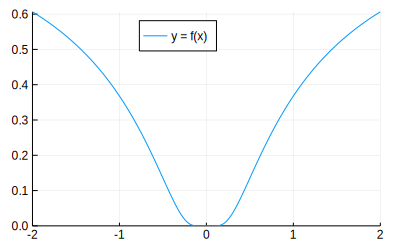

In [10]:
f(x) = x == 0 ? zero(x) : exp(-1/abs(x))
x = -2:0.001:2
plot(x, f.(x), label="y = f(x)", size=(400,250), legend=:top)

### コンピューターを用いた計算例

私が個人的に知る限りの範囲内では, 手計算もきちんとできる人の方がコンピューターを上手に使っている場合が多い. おそらく, その人自身がコンピューターを頼らなくてもある程度の計算ができるおかげで, コンピューターを使った人間には不可能な計算の価値をよく理解できるからなのだろう.

In [11]:
x = symbols("x")
series(e^x, n=10)

         2    3    4     5     6     7       8       9           
        x    x    x     x     x     x       x       x       / 10\
1 + x + -- + -- + -- + --- + --- + ---- + ----- + ------ + O\x  /
        2    6    24   120   720   5040   40320   362880         

In [12]:
series(cos(x), n=10)

     2    4     6      8          
    x    x     x      x      / 10\
1 - -- + -- - --- + ----- + O\x  /
    2    24   720   40320         

In [13]:
series(sin(x), n=10)

     3     5     7       9           
    x     x     x       x       / 10\
x - -- + --- - ---- + ------ + O\x  /
    6    120   5040   362880         

In [14]:
series(log(1+x), n=10)

     2    3    4    5    6    7    8    9         
    x    x    x    x    x    x    x    x     / 10\
x - -- + -- - -- + -- - -- + -- - -- + -- + O\x  /
    2    3    4    5    6    7    8    9          

In [15]:
series(-log(1-x), n=10)

     2    3    4    5    6    7    8    9         
    x    x    x    x    x    x    x    x     / 10\
x + -- + -- + -- + -- + -- + -- + -- + -- + O\x  /
    2    3    4    5    6    7    8    9          

In [16]:
series(asin(x), n=10)

     3      5      7       9         
    x    3*x    5*x    35*x     / 10\
x + -- + ---- + ---- + ----- + O\x  /
    6     40    112     1152         

In [17]:
k = symbols("k", integer=true)
doit(Sum(1/2^(2k)*factorial(2k)/(factorial(k)^2)*x^(2k+1)/(2k+1), (k,0,4)))

    9      7      5    3    
35*x    5*x    3*x    x     
----- + ---- + ---- + -- + x
 1152   112     40    6     

In [18]:
series(atan(x), n=10)

     3    5    7    9         
    x    x    x    x     / 10\
x - -- + -- - -- + -- + O\x  /
    3    5    7    9          

In [19]:
Sum((-1)^k/(2k+1), (k,0,oo))

  oo         
____         
\   `        
 \         k 
  \    (-1)  
  /   -------
 /    2*k + 1
/___,        
k = 0        

In [20]:
doit(Sum((-1)^k/(2k+1), (k,0,oo)))

pi
--
4 

次のセルの f(n,k) は

$$
f(n,k) = \frac{1}{2^n}\binom{n}{k} = \frac{1}{2^n}\frac{n!}{k!(n-k)!}
$$

を意味している. これは $p=1/2$ に対する二項分布における確率である.

lgamma(n+1) = log(nの階乗)

であることに注意せよ. 

次のセルで一度全体の対数を取った式を計算してから exponential を取っている理由は階乗を単体で計算すると簡単にオーバーフローしてしまうからである. 階乗の対数ならばオーバーフローしない.  さらに, $\ds\binom{n}{k}$ と $1/2^n$ を別々に計算した後で掛け合わせる計算の仕方もよくない. 巨大な数を巨大な数で割る数値計算はオーバーフローやアンダーフローを起こしやすい. 対数を取って適度な大きさの数値にして差を取ってから, まとめて exponential するのがよい.

しかし, そのように注意深く書いたコードであっても, もとの級数の収束は極めて遅いので, 1億項を足し合わせても小数点以下第4桁までしか正確に計算できていない. 

In [21]:
f(n,k) = exp(lgamma(n+1)-lgamma(k+1)-lgamma(n-k+1)-n*log(2))
@time sum(k->f(2k,k)/(2k+1), 0:10^8-1), π/2

 11.795130 seconds (26.79 k allocations: 1.373 MiB, 0.10% gc time)


(1.5707399078387505, 1.5707963267948966)

## べき級数の収束

### べき級数の定義

$\ds \sum_{k=0}^\infty a_k x^k$ の形式の級数を**べき級数**と呼ぶ.

$\ds \sum_{k=0}^\infty |a_k x^k|$ が収束するとき, べき級数 $\ds \sum_{k=0}^\infty a_k x^k$ は絶対収束するという.

### べき級数の収束

**準備:** 実数列 $\alpha_n$ が $n\to\infty$ のとき $\alpha_n\to\infty$ となることを, 任意の実数 $M$ に対して(どんなに大きな実数 $M$ に対して), ある番号 $N$ で

$$
\alpha_n \geqq M \quad(n \geqq N)
$$

を満たすものが存在すること(すなわちある番号以降のすべての $n$ について $\alpha_n\geqq M$ 成立すること)であると定める. $\QED$

**定理( d'Alembert の判定法):** $k\to\infty$ のとき $\ds\frac{|a_k|}{|a_{k+1}|}\to\rho > 0$ が成立していると仮定する(上の準備のもとで $\rho=\infty$ であってもよいとする). このとき, べき級数 $\ds\sum_{k=0}^\infty a_k x^k$ は $|x|<\rho$ のとき絶対収束し, $|x|>\rho$ のとき収束しない.

**注意:** 実際には $0<r<\rho$ のとき $|x|\leqq r$ でべき級数 $\ds\sum_{k=0}^\infty a_k x^k$ が一様絶対収束することも示される.

**注意:** このような $\rho$ をべき級数 $\ds\sum_{k=0}^\infty a_k x^k$ の**収束半径**と呼ぶ.

**証明:** $0<r<\rho$ と仮定する. $r$ は幾らでも $\rho$ に近付き得るので, $|x|<\rho$ のときべき級数が絶対収束することを示すためには, $|x|\leqq r$ のときべき級数が絶対収束することを示せば十分である. $r<R<\rho$ を満たす実数 $R$ が存在する.  $|x|\leqq r$ と仮定する. $|a_k|/|a_{k+1}|\to\rho>R>0$ より, ある番号 $N$ が存在して, $k\geqq N$ のとき,

$$
\frac{|a_k|}{|a_{k+1}|} \geqq R, \quad\text{i.e.}\quad 
|a_{k+1}|\leqq \frac{1}{R}|a_k|.
$$

ゆえに, $n=0,1,2,\ldots$ に対して, 

$$
|a_{N+n}| \leqq \frac{1}{R^n}|a_N|.
$$

したがって, $|x|\leqq r$ という仮定より, $n=0,1,2,\ldots$ に対して, 

$$
|a_{N+n}x^{N+n}| \leqq \frac{1}{R^n}|a_N||x|^{N+n} =
|a_N|r^N \left(\frac{r}{R}\right)^n.
$$

$r<R$ という仮定より, $r/R<1$ なので, 右辺の $n=0,1,2,\ldots$ に関する和は有限の値に収束する. ゆえに左辺の同様の和も有限の値に収束する. これより, べき級数

$$
\sum_{k=0}^\infty a_k x^k = \sum_{k=0}^{N-1} a_k x^k + \sum_{n=0}^\infty a_{N+n}x^{N+n}
$$

が絶対収束することがわかる. (**注意:** 以上の議論によって $|x|\leqq r$ で**一様**絶対収束することも示されている.)

$|x|>\rho$ であると仮定する. $\ds\sum_{k=0}^\infty a_k x^k$ が収束しないことを示したい. $|x|>\rho$ と $|a_k|/|a_{k+1}|\to\rho<|x|$ より, ある番号 $N$ が存在して, $k\geqq N$ ならば, $|a_k|\ne 0$ かつ

$$
\frac{|a_k|}{|a_{k+1}|} \leqq |x|, \quad\text{i.e.}\quad |a_{k+1}| \geqq \frac{1}{|x|}|a_k|.
$$

ゆえに, $n=0,1,2,\ldots$ に対して,

$$
|a_{N+n}| \geqq \frac{1}{|x|^n}|a_N|.
$$

したがって, $n=0,1,2,\ldots$ に対して, 

$$
|a_{N+n}x^{N+n}| \geqq \frac{1}{|x|^n}|a_N||x|^{N+n} = |a_N||x|^N \ne 0.
$$

ゆえに $a_n x^n$ は $0$ に収束しない. これより, $\ds\sum_{k=0}^\infty a_k x^k$ が収束しないことがわかる. $\QED$

**例:** べき級数 $\ds \sum_{k=0}^\infty \frac{1}{k!}x^k$ について, $k\to\infty$ のとき, 

$$
\frac{1/k!}{1/(k+1)!} = k+1 \to \infty
$$

なので, そのべき級数は $|x|<\infty$ で絶対収束する. $\QED$

**例:** べき級数 $\ds\sum_{k=0}^\infty \frac{(-1)^k x^{2k}}{(2k)!}$ を $x^2$ のべき級数とみなす.

$$
\frac{1/(2k)!}{1/(2(k+1))!} = (2k+1)(2k+2)\to \infty \quad(k\to\infty)
$$

なので, そのべき級数は $|x|<\infty$ で絶対収束する.


**問題:** べき級数 $\ds\sum_{k=0}^\infty \frac{(-1)^k x^{2k+1}}{(2k+1)!}$ が $|x|<\infty$ で絶対収束することを示せ.

**ヒント:** そのべき級数と $x^2$ のべき級数と $x$ の積とみなしてから, d'Alembertの判定法を適用せよ. $\QED$

d'Alembertの判定法だけで十分な場合が多いが, 次のより精密な定理も知られている.

**Cauchy-Hadamard定理:** $\ds \rho=\limsup_{n\to\infty}|a_n|^{1/n}$ とおき, $\rho>0$ と仮定する.  このとき, べき級数 $\ds\sum_{k=0}^\infty a_k x^k$ は $|x|<\rho$ のとき絶対収束し, $|x|>\rho$ のとき収束しない.

**注意:** 実際には $0<r<\rho$ のとき $|x|\leqq r$ でべき級数 $\ds\sum_{k=0}^\infty a_k x^k$ が一様絶対収束することも示される.

**注意:** Cauchy-Hadamardの定理はべき級数 $\ds\sum_{k=0}^\infty a_k x^k$ の**収束半径** $\rho$ は $\ds \rho=\limsup_{n\to\infty}|a_n|^{1/n}$ で計算可能なことを意味している.

**証明:** $\ds \rho=\limsup_{n\to\infty}|a_n|^{1/n}$ とおく.

$0<r<\rho$ と仮定する. $r<R<\rho$ を満たす実数 $R$ が存在する. $\ds \limsup_{n\to\infty}|a_n|^{1/n}=\rho<\frac{1}{R}$ より, ある番号 $N$ が存在し, $n\geqq N$ ならば $\ds \sup_{k\geqq n}|a_k|^{1/k}\leqq \frac{1}{R}$ となる. そのとき特に $k\geqq N$ のとき $\ds |a_k|\leqq \frac{1}{R^k}$ となる. したがって, $|x|\geqq r$ のとき, $k\geqq N$ のとき, 

$$
|a_k x^k| \leqq \left(\frac{r}{R}\right)^k
$$

となる. $|r/R|<1$ なので, $|x|\leqq r$ で $\ds \sum_{k=0}^\infty a_k x^k$ が一様絶対収束することがわかった.

$|x|>\rho$ と仮定する. このとき, 

$$
\rho = \limsup_{n\to\infty}|a_n|^{1/n}=\inf_{n\geqq 0}\sup_{k\geqq n}|a_k|^{1/k}
$$

より, $n=0,1,2,\ldots$ に対して $\sup_{k\geqq n}|a_k|^{1/k}\geqq\rho$ なので, $\ds \rho > \frac{1}{|x|}$ より, 各 $n$ ごとにある $k\geqq n$ で $\ds |a_k|^{1/k} \geqq \frac{1}{|x|}$ を満たすものが存在し, 

$$
|a_k x^k| \geqq 1
$$

となる. ゆえに, $|a_k x^k|$ は $0$ に収束しないので, $\ds\sum_{k=0}^\infty a_k x^k$ も収束しない.  $\QED$

**例:** べき級数

$$
1 - x + x^2 - x^3 + x^4 - x^5 + \cdots
$$

の収束半径は数列 $|-1|^{1/1}=1$, $|1|^{1/2}=1$, $|-1|^{1/3}=1$, $|1|^{1/4}=1$, $\ldots$ の上極限の $1$ であり, $|x|<1$ で $\ds\frac{1}{1+x}$ に収束するので, このべき級数は $x\nearrow 1$ で $1$ に収束する.

それではべき級数

$$
F(x) = \sum_{n=0}^\infty (-1)^n x^{2^n} = x - x^2 + x^4 - x^8 + x^{16} - x^{32} + \cdots
$$

についてはどうなるだろうか? これの収束半径も数列 $|1|^{1/1}=1$, $|-1|^{1/2}=1$, $|1|^{1/4}=1$, $|-1|^{1/8}=1$, $\ldots$ の上極限の $1$ になる. 

もしも $x\nearrow 1$ で $f(x)$ が $\alpha$ に収束するならば, $F(x^2) = x - F(x)$ なので, $x\nearrow 1$ の極限を取って $\alpha=1-\alpha$ すなわち $\ds\alpha=\frac{1}{2}$ となる. 

そこで実際に $x\nearrow 1$ のとき $F(x)\to 1/2$ となるかどうかを確認するために1000項足した結果を計算してみると, 例えば
    
    F(0.9) = 0.4677755990574414
    F(0.99) = 0.49409849522830906
    F(0.999) = 0.5001242215513184
    F(0.9999) = 0.5020251448564931
    F(0.99999) = 0.4973598550256996
    F(0.999999) = 0.5007394876031053

を得る. これらは確かに $\ds\frac{1}{2}=0.5$ にかなり近いように見える.

**しかし, べき級数の $F(x)$ の値は $x\nearrow 1$ で収束しない!!!** この事実のTauber型定理を使った証明については

* 黒木玄, <a href="https://genkuroki.github.io/documents/20160501StirlingFormula.pdf">ガンマ分布の中心極限定理とStirlingの公式</a>

の第10.4節を見よ. $\QED$

In [22]:
# 上のセルのべき級数の数値計算例

F(x; N=10^3) = sum(n->(-1)^n*x^(2.0^n), 0:N)
@show F(0.9)
@show F(0.99)
@show F(0.999)
@show F(0.9999)
@show F(0.99999)
@show F(0.999999);

F(0.9) = 0.4677755990574414
F(0.99) = 0.49409849522830906
F(0.999) = 0.5001242215513184
F(0.9999) = 0.5020251448564931
F(0.99999) = 0.4973598550256996
F(0.999999) = 0.5007394876031053


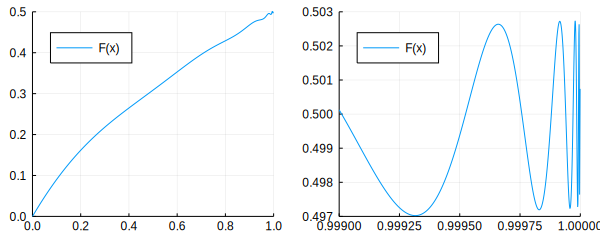

In [23]:
# 上の f(x) が x→1 で収束しないことの数値的確認

F(x; N=10^3) = sum(n->(-1)^n*x^(2.0^n), 0:N)
x = 0:0.001:0.999
P1 = plot(x, F.(x), label="F(x)", ylims=(0,0.5), xlims=(0,1))
x = 0.999:0.000001:0.999999
P2 = plot(x, F.(x), label="F(x)", ylims=(0.497, 0.503), xlims=(0.999,1))
plot(P1, P2, size=(600, 240), legend=:topleft)

## 超幾何級数

次のべき級数を**Gaussの超幾何級数** (Gauss's hypergeometric series)と呼ぶ:

$$
{}_2F_1(a,b; c; x) = \sum_{k=0}^\infty \frac{(a)_k (b)_k}{(c)_k k!} x^k.
$$

ここで

$$
(\alpha)_k = \alpha(\alpha+1)\cdots(\alpha+k-1).
$$

より一般に

$$
{}_rF_s(a_1,\ldots,a_r;b_1,\ldots,b_s;x) =
\sum_{k=0}^\infty \frac{(a_1)_k\cdots(a_r)_k}{(b_1)_k\cdots(b_s)_k k!}x^k
$$

と定める.

**問題:** Gaussの超幾何級数 ${}_2F_1$ が $|x|<1$ で絶対収束することを示せ.

**解答例:** d'Alembertの判定法を使おう.

$$
\frac{(a)_k(b)_k/((c)_k k!)}{(a)_{k+1}(b)_{k+1}/((c)_{k+1}(k+1)!)} =
\frac{(c+k)(k+1)}{(a+k)(b+k)}\to 1 \qquad(k\to\infty)
$$

より, Gaussの超幾何級数は $|x|<1$ で絶対収束する. $\QED$

**問題:** 以下を示せ:

$$
(1)_k=k!, \quad (2)_k = (k+1)!, \quad
(1/2)_k k! = \frac{(2k)!}{4^k}, \quad
(2k+1)(1/2)_k = (3/2)_k.
$$

**ヒント:** 3つ目の公式を除けば易しい. 3つ目の公式は以下のようにして示される:

$$
(1/2)_k k! =
\frac{1}{2}\frac{3}{2}\cdots\frac{2k-1}{2} k! =
\frac{1\cdot3\cdots(2k-1)}{2^k}\frac{2\cdot4\cdots(2k)}{2^k} =
\frac{(2k)!}{4^k}. \quad \QED
$$

**例:** 初等函数を以下のように表すことができる:
$$
\begin{aligned}
&
{}_0F_0(;; x) = \sum_{k=0}^\infty\frac{1}{k!}x^k = e^x.
\\ &
{}_0F_1(;1/2;-x^2/4) = 
\sum_{k=0}^\infty \frac{(-x^2/4)^k}{(1/2)_k k!} =
\sum_{k=0}^\infty \frac{(-x^2)^k}{(2k)!} = \cos x.
\\ &
{}_1F_0(a;; x) = \sum_{k=0}^\infty\frac{(a)_k}{k!}x^k = (1-x)^{-a}.
\\ &
{}_2F_1(1,1;2;x) = \sum_{k=0}^\infty\frac{k!k!}{(k+1)!k!}x^k = 
\sum_{k=0}^\infty\frac{x^k}{k+1} = -\frac{\log(1-x)}{x}.
\\ &
x\;{}_2F_1(1/2,1;3/2;-x^2) =
x\sum_{k=0}^\infty\frac{(1/2)_k k!}{(3/2)_k k!}(-x^2)^k =
x\sum_{k=0}^\infty\frac{(-x^2)^k}{2k+1} = \arctan x.
\end{aligned}
$$

**問題:** 上の例の結果を確認せよ. $\QED$

**問題:** $\sin x$ を ${}_0F_1$ を使って表せ. $\QED$

**問題:** $\arcsin x$ を ${}_2F_1$ を使って表せ. $\QED$

**ヒント:** <a href="https://www.google.co.jp/search?q=%E8%B6%85%E5%B9%BE%E4%BD%95+%E5%88%9D%E7%AD%89%E5%87%BD%E6%95%B0">「超幾何 初等函数」を検索</a>.

**問題:** ガンマ函数とベータ函数を

$$
\Gamma(s) = \int_0^\infty e^{-x}x^{s-1}\,dx, \quad
B(p,q) = \int_0^1 t^{p-1}(1-t)^{q-1}\,dt
\quad(s,p,q > 0)
$$

と定めると, 

$$
(x)_k = \frac{\Gamma(x+k)}{\Gamma(x)}, \quad
B(p,q) = \frac{\Gamma(p)\Gamma(q)}{\Gamma(p+q)}
$$

が成立することを認めて, $c>b>0$ のとき

$$
{}_2F_1(a,b;c;x) = \frac{1}{B(b,c-b)}
\int_0^1 t^{b-1}(1-t)^{c-b-1}(1-xt)^{-a}\,dt
$$

が成立することを示せ. これを**Gaussの超幾何函数の積分表示**と呼ぶ.

**解答例:** 

$$
\begin{aligned}
\frac{(a)_k (b)_k}{(c)_k k!} x^k &=
\frac{\Gamma(b+k)\Gamma(c)}{\Gamma(b)\Gamma(x+k)} \frac{(a)_k}{k!}x^k =
\frac{B(b+k,c-b)}{B(b,c-b)}\frac{(a)_k}{k!}x^k
\\ &=
\frac{1}{B(b,c-b)}\int_0^1 t^{b-1}(1-t)^{c-b-1} \frac{(a)_k}{k!}(xt)^k\,dt.
\end{aligned}
$$

ゆえに, これを $k=0,1,2,\ldots$ について足し上げて目的の公式を得る. $\QED$

**問題:** 以下の公式を示せ: $c>b>0$ のとき,

$$
{}_1F_1(b;c;x) = \frac{1}{B(b,c-b)}\int_0^1 t^{b-1}(1-t)^{c-b-1}\,e^{xt}\,dt
$$

となることを示せ. これを**Kummerの合流型超幾何函数の積分表示**と呼ぶ.

$$
\begin{aligned}
\frac{(b)_k}{(c)_k k!} x^k &=
\frac{\Gamma(b+k)\Gamma(c)}{\Gamma(b)\Gamma(x+k)} \frac{x^k}{k!} =
\frac{B(b+k,c-b)}{B(b,c-b)}\frac{x^k}{k!}
\\ &=
\frac{1}{B(b,c-b)}\int_0^1 t^{b-1}(1-t)^{c-b-1} \frac{(xt)^k}{k!}\,dt.
\end{aligned}
$$

ゆえに, これを $k=0,1,2,\ldots$ について足し上げて目的の公式を得る. $\QED$